In [99]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv("C:\\Users\\sanja\\Downloads\\startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [101]:
startup_names = sorted(df['Startup Name'].unique().tolist())
df['Investors Name'] = df['Investors Name'].fillna("undisclosed")
sorted(df['Investors Name'].unique().tolist())

['"Kedaraa Capital, Ontario Teachers\\\\\'"',
 '021 Capita, Binny Bansal',
 '1Crowd',
 '1Crowd (through crowd funding)',
 '1Crowd (through crowdfunding)',
 '1Crowd, Ankur Capital',
 '1Crowd, Eureka Forbes Ltd, Shapoorji Pallonji & Co. Ltd.',
 '3 undisclosed HNIs',
 '3 undisclosed investors',
 '3One4 Capital',
 '3one4 Capital, Mumbai Angels, Aarin Capital',
 '3one4 Capital, Tracxn Labs, Aaruha Technology Fund, Endiya Partners',
 '3one4 capital',
 '500 Startups',
 '500 Startups, IDG Ventures & Advantedge fund, Neeraj Arora, Leon Seynave',
 '500 Startups, IvyCap Ventures',
 '500 Startups, Littlerock, Singularity Ventures',
 '500 Startups, Mato Peric & Others',
 '500 Startups, Mato Peric, TracxnLabs',
 '500 Startups, Purvi Capital, Rajan Anandan, Abhishek Gupta',
 '500 Startups, Smile Multimedia, Kunal Bahl, Rohit Bansal, Girish Matrubootham',
 '500 Startups, TV Mohandas Pai, Tandem Capital, Vikram Chachra, Aloke Bajpai',
 '50K Ventures',
 '50k Ventures, Munish Jauhar, Pulkit Jain, Rohit N

In [102]:
df.drop(columns=['Remarks'],inplace=True)

In [103]:
df.set_index("Sr No",inplace=True)

In [104]:
df.head(2)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"


In [105]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name	':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
},inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            3044 non-null   object
 1   startup         3044 non-null   object
 2   vertical        2873 non-null   object
 3   subvertical     2108 non-null   object
 4   city            2864 non-null   object
 5   Investors Name  3044 non-null   object
 6   round           3040 non-null   object
 7   amount          2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [107]:
df['amount'] = df['amount'].fillna('0')

In [108]:
df['amount'] = df['amount'].str.replace(",",'')

In [109]:
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')

In [110]:
df = df[df['amount'].str.isdigit()]

In [111]:
df['amount'] = df['amount'].astype('float')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3029 non-null   object 
 1   startup         3029 non-null   object 
 2   vertical        2858 non-null   object 
 3   subvertical     2104 non-null   object 
 4   city            2849 non-null   object 
 5   Investors Name  3029 non-null   object 
 6   round           3027 non-null   object 
 7   amount          3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [113]:
df.head()

,date,startup,vertical,subvertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [114]:
def to_inr(dollar):
    inr = dollar * 83.36
    return inr/10000000


In [115]:
df['amount'] = df['amount'].apply(to_inr)

In [116]:
df.head()

,date,startup,vertical,subvertical,city,Investors Name,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,153.039457
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.008000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.004800


In [117]:
df['date'] = df['date'].str.replace('05/072018','05/07/2018')

In [118]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

C:\Users\sanja\AppData\Local\Temp\ipykernel_6204\1838826657.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'],errors='coerce')


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3027 non-null   datetime64[ns]
 1   startup         3029 non-null   object        
 2   vertical        2858 non-null   object        
 3   subvertical     2104 non-null   object        
 4   city            2849 non-null   object        
 5   Investors Name  3029 non-null   object        
 6   round           3027 non-null   object        
 7   amount          3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [120]:
df.rename(columns={'Investors Name':'investors'},inplace=True)

In [121]:
df = df.dropna(subset=['date','startup','vertical','city','investors','round','amount'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2846 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2846 non-null   datetime64[ns]
 1   startup      2846 non-null   object        
 2   vertical     2846 non-null   object        
 3   subvertical  2096 non-null   object        
 4   city         2846 non-null   object        
 5   investors    2846 non-null   object        
 6   round        2846 non-null   object        
 7   amount       2846 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 200.1+ KB


In [123]:
df.to_csv("C:\\Users\\sanja\\PycharmProjects\\Startup-Dashboard\\startup_cleaned.csv", index=False)

In [124]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [125]:
df[df['investors'].str.contains(' Accel Partner')].head()[['date','startup','vertical','investors','round','amount']]

,date,startup,vertical,investors,round,amount
Sr No,,,,,,
108,2019-11-04,CleverTap,SaaS,"Sequoia India, Tiger Global Management, Accel ...",Series B,216.7360
173,2018-08-08,Metro Bikes,Consumer Internet,"Sequoia Capital India Advisors, Accel Partners...",Private Equity,101.6992
188,2018-08-28,Narvar,IT,Accel (formerly known as Accel Partners),Private Equity,25.0080
223,2018-07-30,Cure Fit,Consumer Internet,"IDG Ventures, Accel Partners, Kalaari Capital ...",Private Equity,1000.3200
248,2018-06-22,WickedRide,Consumer Internet,"Sequoia Capital, Accel Partners & Raghunandan ...",Private Equity,75.8576


In [126]:
df[df['investors'].str.contains('Abhishek Gupta')].groupby('startup')['amount'].sum().sort_values(ascending=False).head().reset_index()

,startup,amount
0,Swajal,10.0032
1,Bottr.me,0.0000


In [127]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,153.039457
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.008000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.004800


In [128]:
df['vertical'] = df['vertical'].replace('ECommerce','Ecommerce')

In [129]:
df['vertical'] = df['vertical'].replace('eCommerce','Ecommerce')

In [130]:
df[df['vertical'] == 'eCommerce']

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,


<Axes: ylabel='amount'>

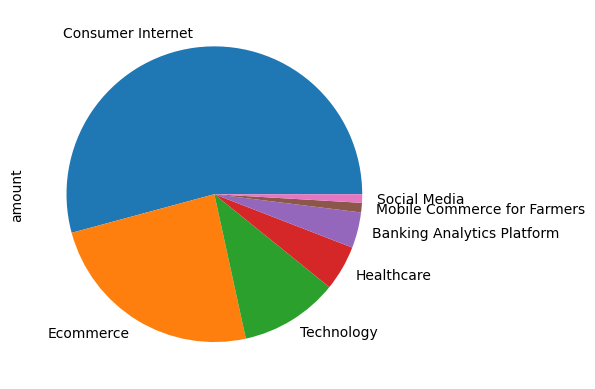

In [131]:
df[df['investors'].str.contains('IDG Venture')].groupby('vertical')['amount'].sum().sort_values(ascending=False).head(7).plot(kind='pie')

In [132]:
df[df['investors'].str.contains('IDG Venture')].groupby('city')['amount'].sum().sort_values(ascending=False)

city
Bengaluru    1158.704000
Bangalore     698.556800
New Delhi     580.947302
Mumbai        355.947200
Pune          254.248000
Chennai       171.721600
Delhi          45.848000
Singapore      25.008000
Gurgaon         8.336000
Name: amount, dtype: float64

In [133]:
df['year'] = df['date'].dt.year

In [134]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000,2020
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,153.039457,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.008000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.004800,2020


<Axes: xlabel='year'>

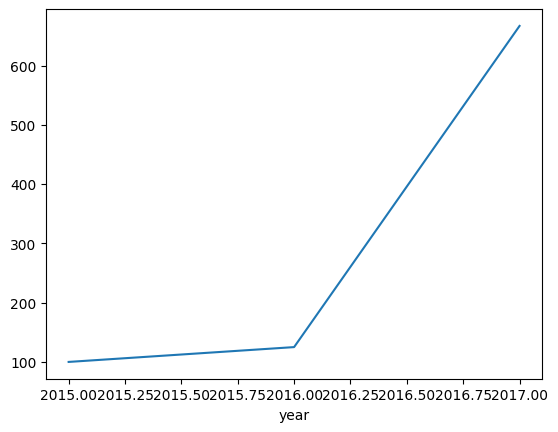

In [135]:
df[df['investors'].str.contains('Accel India')].groupby('year')['amount'].sum().plot()

In [136]:
round(df['amount'].sum())

304785

In [137]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False).head(1).values[0]

33841.6592

In [138]:
round(df.groupby('startup')['amount'].sum().mean())

131

In [139]:
df['startup'].nunique()

2318

In [140]:
df['month'] = df['date'].dt.month

In [141]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412,2020,1


In [142]:
temp_df = df.groupby(['year','month'])['startup'].count().reset_index()

In [143]:
temp_df1 = df.groupby(['year','month'])['amount'].sum().reset_index()

In [144]:
temp_df1['x-axis'] = temp_df1['month'].astype(str) + ' - ' + temp_df1['year'].astype(str)

In [145]:
temp_df1[['x-axis','amount']]

,x-axis,amount
0,1 - 2015,5329.621600
1,2 - 2015,1583.514896
2,3 - 2015,1933.243440
3,4 - 2015,4566.419120
4,5 - 2015,1420.204320
...,...,...
58,12 - 2019,3754.534400
59,1 - 2020,142.115412
60,2 - 2020,40.012800
61,9 - 2020,1820.239457


In [146]:
df['startup'].unique()

array(['BYJU’S', 'Shuttl', 'Mamaearth', ..., 'Dazo', 'Tradelab', 'PiQube'],
      dtype=object)

In [147]:
df['investors']

Sr No
1                                 Tiger Global Management
2                               Susquehanna Growth Equity
3                                   Sequoia Capital India
4                                          Vinod Khatumal
5                                 Sprout Venture Partners
                              ...                        
2869                                        SAIF Partners
2870    Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...
2871                                           Rainmatter
2872                                          The HR Fund
2873             Bessemer Venture Partners, SAIF Partners
Name: investors, Length: 2846, dtype: object

In [148]:
sorted(set(df['investors'].str.split(',').sum()))

['',
 ' & Others',
 ' 100 Co-founders Lab and others.',
 ' 122 West Ventures',
 ' 1Crowd',
 ' 3ONE4 Capital Advisors',
 ' 3one4 Capital',
 ' 3one4 Capital Advisors LLP',
 ' 500 Start-Ups',
 ' 500 Startups',
 ' 500 Startups & Other HNIs',
 ' 50K Ventures & others',
 ' 91SpringBoard',
 ' 91springboard',
 ' ABB Technology Ventures',
 ' ABCOM Investments',
 ' AECAL',
 ' AET Fund',
 ' AL Nour International Holdings and Mark V Investments',
 ' ASP Consulting',
 ' AVN Business Solutions',
 ' Aarin Capital',
 ' Aarin Capital & Others',
 ' Aaruha Technology Fund',
 ' Abaran Deep',
 ' Abhai S. Rao',
 ' Abhay Singhal',
 ' Abhijit Bhandari',
 ' Abhinav Patodia',
 ' Abhinav Sinha',
 ' Abhishek Acharya',
 ' Abhishek Goyal',
 ' Abhishek Gupta',
 ' Abhishek Jain',
 ' Abhishekh Goyal',
 ' Abstract Ventures',
 ' Abu Farhan Azmi',
 ' Accel',
 ' Accel India',
 ' Accel Partner',
 ' Accel Partners',
 ' Accel Partners & Others',
 ' Accel Partners & Raghunandan Gangappa',
 ' Accel Partners & existing investor

In [149]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412,2020,1


In [150]:
df.groupby('year')['amount'].sum().reset_index()

,year,amount
0,2015,61092.426656
1,2016,31910.508996
2,2017,86938.725909
3,2018,42700.062724
4,2019,78890.553776
5,2020,3252.767669


In [151]:
df.head(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1667.200000,2020,9
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.091412,2020,1


In [152]:
df['vertical'] = df['vertical'].replace('E-Commerce','Ecommerce')

In [153]:
df.groupby('vertical')['amount'].sum().sort_values(ascending=False).head(7)

vertical
Ecommerce             68062.195410
Consumer Internet     52125.272626
Transportation        32649.047636
Technology            18586.845304
Finance               16433.907168
FinTech               10175.849105
Online Marketplace     5836.392048
Name: amount, dtype: float64

In [154]:
df.groupby('vertical')['startup'].count().sort_values(ascending=False).head(7)

vertical
Consumer Internet    935
Technology           478
Ecommerce            283
Healthcare            70
Finance               62
Logistics             32
Education             23
Name: startup, dtype: int64

In [155]:
df['city'] = df['city'].replace('Bangalore','Bengaluru')

In [156]:
df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10).reset_index()

,city,amount
0,Bengaluru,153757.998178
1,Mumbai,41017.746605
2,New Delhi,25156.521470
3,Gurgaon,25011.385741
4,Noida,10527.234304
5,Gurugram,7218.413512
6,Chennai,5991.641712
7,Pune,5277.371552
8,Menlo Park,3751.200000
9,Hyderabad,3343.371453


In [161]:
df.sort_values(by='amount',ascending=False).groupby('year').head(1)[['year','startup','amount']]

,year,startup,amount
Sr No,,,
61,2019,Rapido Bike Taxi,32510.4
652,2017,Flipkart,20840.0
2649,2015,Flipkart.com,5835.2
189,2018,True North,5001.6
1,2020,BYJU’S,1667.2
1951,2016,Snapdeal,1667.2


In [165]:
df.groupby('startup')['amount'].sum().sort_values(ascending=False).head(10).reset_index()


,startup,amount
0,Flipkart,33841.6592
1,Rapido Bike Taxi,32510.4000
2,Paytm,26249.6472
3,Ola,8206.7920
4,Udaan,7252.3200
5,Snapdeal,5835.2000
6,Flipkart.com,5835.2000
7,Ola Cabs,5582.6192
8,True North,5001.6000
9,BigBasket,4226.3520


In [172]:
df['vertical'].unique().tolist()

['E-Tech',
 'Transportation',
 'E-commerce',
 'FinTech',
 'Fashion and Apparel',
 'Logistics',
 'Hospitality',
 'Technology',
 'Ecommerce',
 'Aerospace',
 'B2B-focused foodtech startup',
 'Finance',
 'Video',
 'Gaming',
 'Software',
 'Health and wellness',
 'Education',
 'Food and Beverage',
 'Health and Wellness',
 'B2B Marketing',
 'Video Games',
 'SaaS',
 'Last Mile Transportation',
 'Healthcare',
 'Customer Service',
 'B2B',
 'Consumer Goods',
 'Advertising, Marketing',
 'IoT',
 'Information Technology',
 'Consumer Technology',
 'Accounting',
 'Retail',
 'Customer Service Platform',
 'Automotive',
 'EdTech',
 'Services',
 'Compliance',
 'Transport',
 'Artificial Intelligence',
 'Tech',
 'Health Care',
 'Luxury Label',
 'Waste Management Service',
 'Deep-Tech',
 'Energy',
 'Digital Media',
 'Saas',
 'Automobile',
 'Agtech',
 'Social Media',
 'Fintech',
 'Edtech',
 'AI',
 'Nanotechnology',
 'Services Platform',
 'Travel Tech',
 'Online Education',
 'Online Marketplace',
 'SaaS, Ecomm

In [175]:
temp_df = df[df['vertical'] == 'E-Tech']

In [178]:
temp_df.groupby('investors')['amount'].sum().sort_values(ascending=False).head(5).reset_index()

,investors,amount
0,Tiger Global Management,1667.2


In [183]:
df.groupby('round')['amount'].sum().sort_values(ascending=False).head(5)

round
Private Equity    211781.441423
Series B           39880.142855
Series D           12352.276464
Series C            8708.772532
Funding Round       8336.000000
Name: amount, dtype: float64

In [203]:
df.sample(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
2516,2015-12-08,Sheroes,Career Community for Women,NaN,Noida,"Quintillion Media, 500 Startups",Seed Funding,6.41872,2015,12
1348,2016-06-09,CheersOye!,Consumer Internet,Online Gift Vouchers platform,Mumbai,Undisclosed Investors,Seed Funding,4.16800,2016,6


In [206]:
df[df['startup'] == 'Sheroes'].groupby('startup')['vertical'].sum().values[0]

'Consumer InternetCareer Community for Women'

In [239]:
df.sample(2)

,date,startup,vertical,subvertical,city,investors,round,amount,year,month
Sr No,,,,,,,,,,
258,2018-02-05,OpenTap,Finance,Online Lending Platform,Chennai,Unknown High Net-Worth Individuals,Seed / Angel Funding,3.7512,2018,2
921,2017-04-27,iNurture,Consumer Internet,Online Educational courses,Bengaluru,BlackSoil Capital Pvt. Ltd,Private Equity,12.5040,2017,4


In [242]:
df[df['startup'] == "iNurture"].groupby('startup')['amount'].sum().values[0]

49.1824

In [255]:
df[df['startup'] == "iNurture"]['date'].iloc[0]

Timestamp('2018-01-31 00:00:00')